In [2]:
#Loading pandas and importing the file.
import pandas as pd
import numpy as np

In [3]:
SuperStoreOrders = pd.read_csv('Downloads\SuperStoreOrders.csv', sep=',')
SuperStoreOrders.info()
#telling us we have 1 int, 19 objects. and 51292, 20 as shape.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51292 entries, 0 to 51291
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        51292 non-null  object
 1   order_date      51292 non-null  object
 2   ship_date       51292 non-null  object
 3   ship_mode       51292 non-null  object
 4   customer_name   51292 non-null  object
 5   segment         51284 non-null  object
 6   state           51292 non-null  object
 7   country         51292 non-null  object
 8   market          51292 non-null  object
 9   region          51292 non-null  object
 10  product_id      51292 non-null  object
 11  category        51292 non-null  object
 12  sub_category    51292 non-null  object
 13  product_name    51292 non-null  object
 14  sales           51292 non-null  object
 15  quantity        51292 non-null  int64 
 16  discount        51292 non-null  object
 17  profit          51292 non-null  object
 18  shippi

In [4]:
SuperStoreOrders.head()
#can immediately see that some changes are needed.
#e.g., $ on discount, shipping cost and sales.
#unsure how % at the end affects discount so will find out.

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",$408,2,0.00%,$106.14,$35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",$120,3,10.00%,$36.04,$9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",$66,4,0.00%,$29.64,$8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",$45,3,50.00%,-$26.06,$4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",$114,5,10.00%,$37.77,$4.70,Medium


In [5]:
#finding missing data
SuperStoreOrders.isnull().sum()
#4 missing values in shipping. 8 in segment.

#removing data without values.
SuperStoreOrders2 = SuperStoreOrders.dropna()
SuperStoreOrders2.shape
#this confirms that 12 rows with missing values have been removed.

(51280, 20)

In [6]:
SuperStoreOrders2.duplicated().sum()
#identifying 2 duplicated rows.

2

In [7]:
SuperStoreOrders3 = SuperStoreOrders2.drop_duplicates()
print(SuperStoreOrders2.shape)
print(SuperStoreOrders3.shape)
#shape shows 2 rows have gone, aka the duplicated ones.

(51280, 20)
(51278, 20)


In [8]:
SuperStoreOrders3['sales'] = SuperStoreOrders3['sales'].str.replace('$', '').str.replace(',', '').astype(int)
SuperStoreOrders3['discount'] = SuperStoreOrders3['discount'].str.replace('%', '').str.replace(',','').astype(float)
SuperStoreOrders3['profit'] = SuperStoreOrders3['profit'].str.replace('$', '').str.replace(',','').astype(float)
SuperStoreOrders3['shipping_cost'] = SuperStoreOrders3['shipping_cost'].str.replace('$', '').str.replace(',','').astype(float)
SuperStoreOrders3.head()

#haven't looked into why it's red.
#but this replaces all the strings to enable numbers to be ints and floats.
#commas were identified as an issue in a different v ersion, this is simply the clean one.

C:\Users\samue\AppData\Local\Temp\ipykernel_4792\2644551152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SuperStoreOrders3['sales'] = SuperStoreOrders3['sales'].str.replace('$', '').str.replace(',', '').astype(int)
C:\Users\samue\AppData\Local\Temp\ipykernel_4792\2644551152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SuperStoreOrders3['discount'] = SuperStoreOrders3['discount'].str.replace('%', '').str.replace(',','').astype(float)
C:\Users\samue\AppData\Local\Temp\ipykernel_4792\2644551152.p

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.14,35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,10.0,36.04,9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.64,8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,50.0,-26.06,4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,10.0,37.77,4.70,Medium


In [9]:
import datetime as dt

SuperStoreOrders3['order_date'] = pd.to_datetime(SuperStoreOrders3['order_date'], format ='%d/%m/%Y')
SuperStoreOrders3['ship_date'] = pd.to_datetime(SuperStoreOrders3['ship_date'], format ='%d/%m/%Y')
#date times are changed to datetime in their format.

C:\Users\samue\AppData\Local\Temp\ipykernel_4792\1910340368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SuperStoreOrders3['order_date'] = pd.to_datetime(SuperStoreOrders3['order_date'], format ='%d/%m/%Y')
C:\Users\samue\AppData\Local\Temp\ipykernel_4792\1910340368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SuperStoreOrders3['ship_date'] = pd.to_datetime(SuperStoreOrders3['ship_date'], format ='%d/%m/%Y')


In [10]:
SuperStoreOrders3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51278 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51278 non-null  object        
 1   order_date      51278 non-null  datetime64[ns]
 2   ship_date       51278 non-null  datetime64[ns]
 3   ship_mode       51278 non-null  object        
 4   customer_name   51278 non-null  object        
 5   segment         51278 non-null  object        
 6   state           51278 non-null  object        
 7   country         51278 non-null  object        
 8   market          51278 non-null  object        
 9   region          51278 non-null  object        
 10  product_id      51278 non-null  object        
 11  category        51278 non-null  object        
 12  sub_category    51278 non-null  object        
 13  product_name    51278 non-null  object        
 14  sales           51278 non-null  int32         
 15  quantit

In [11]:
SuperStoreOrders3['Year'] = SuperStoreOrders3['order_date'].dt.year
SuperStoreOrders3
#making a year table.

C:\Users\samue\AppData\Local\Temp\ipykernel_4792\1582495353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SuperStoreOrders3['Year'] = SuperStoreOrders3['order_date'].dt.year


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.14,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,10.0,36.04,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.64,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,50.0,-26.06,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,10.0,37.77,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,20.0,4.52,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.42,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.36,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.56,0.20,Medium,2014


In [12]:
SuperStoreOrders3['Delivery Days'] = SuperStoreOrders3['ship_date'] - SuperStoreOrders3['order_date'].astype('timedelta64[Y]'.astype('int)'))                                                                                        

AttributeError: 'str' object has no attribute 'astype'

In [ ]:
SuperStoreOrders3['Delivery Days'] = SuperStoreOrders3(['ship_date'] - SuperStoreOrders3['order_date']).dt.days


In [ ]:
SuperStoreOrders3.head()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
SuperStoreOrders4 = SuperStoreOrders3['customer_name'].value_counts()
SuperStoreOrders4

<Axes: xlabel='country', ylabel='sales'>

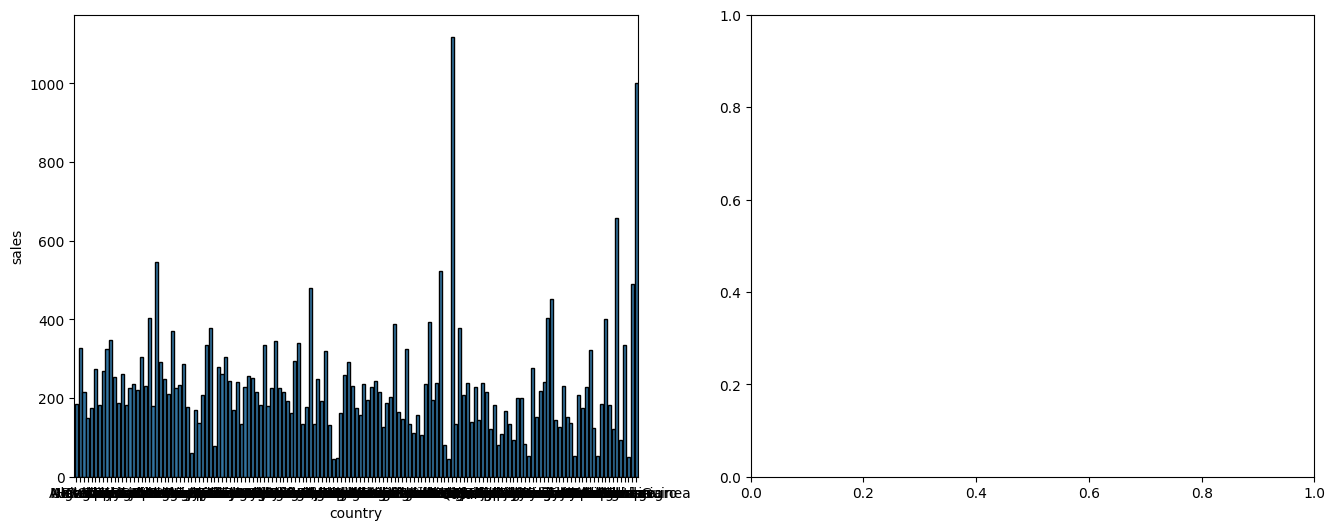

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.barplot(x='country', y='sales', 
             data=SuperStoreOrders3, ax=ax[0],
           errorbar=None, edgecolor='black')

In [17]:
country = SuperStoreOrders3.groupby('country')['sales'].sum()

In [18]:
sns.barplot(x='country', y='sales', 
             data=country, ax=ax[0],
           errorbar=None, edgecolor='black')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

In [19]:
sns.histplot(x='sales', y='profit', bins=10, dataset=SuperStoreOrders3, color='red')

ValueError: Could not interpret value `sales` for `x`. Value is a string, but `data` was not passed.

In [21]:
SuperStoreOrders3.head(50)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.14,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,10.0,36.04,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.64,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,50.0,-26.06,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,10.0,37.77,4.70,Medium,2011
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,10.0,15.34,1.80,Medium,2011
6,CA-2011-1510,2011-01-02,2011-01-06,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314,1,0.0,3.12,24.10,Medium,2011
7,IN-2011-79397,2011-01-03,2011-01-03,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276,1,10.0,110.41,125.32,Critical,2011
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912,4,40.0,-319.46,107.10,Low,2011
9,IZ-2011-4680,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0.0,253.32,81.26,High,2011


In [24]:
client = SuperStoreOrders3['order_id'] = 'ES-2011-3848439'

C:\Users\samue\AppData\Local\Temp\ipykernel_4792\2664785125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client = SuperStoreOrders3['order_id'] = 'ES-2011-3848439'


In [25]:
client

'ES-2011-3848439'

In [35]:
isolated = SuperStoreOrders3[(SuperStoreOrders3.order_id == 'MX-2011-140641')]

In [39]:
isolated.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Year


In [40]:
isolated.iloc[0]

IndexError: single positional indexer is out-of-bounds

In [44]:
location = SuperStoreOrders3[SuperStoreOrders3['customer_name']=='Beth Thompson']
location

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Year
29,ES-2011-3848439,2011-01-04,2011-01-11,Standard Class,Beth Thompson,Home Office,Granma,Cuba,LATAM,Caribbean,...,Office Supplies,Envelopes,"Jiffy Interoffice Envelope, Set of 50",186,6,0.0,3.60,16.39,Medium,2011
33,ES-2011-3848439,2011-01-04,2011-01-11,Standard Class,Beth Thompson,Home Office,Alagoas,Brazil,LATAM,South,...,Office Supplies,Envelopes,"Jiffy Interoffice Envelope, Set of 50",74,6,60.0,-107.86,7.04,Medium,2011
1792,ES-2011-3848439,2011-04-25,2011-04-30,Standard Class,Beth Thompson,Home Office,California,United States,US,West,...,Furniture,Chairs,GuestStacker Chair with Chrome Finish Legs,1487,5,20.0,148.70,205.45,High,2011
1796,ES-2011-3848439,2011-04-25,2011-04-30,Standard Class,Beth Thompson,Home Office,California,United States,US,West,...,Office Supplies,Appliances,Kensington 6 Outlet MasterPiece HOMEOFFICE Pow...,271,3,0.0,78.51,45.48,High,2011
1802,ES-2011-3848439,2011-04-25,2011-04-30,Standard Class,Beth Thompson,Home Office,California,United States,US,West,...,Furniture,Furnishings,Tenex Traditional Chairmats for Medium Pile Ca...,303,5,0.0,63.68,11.36,High,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49135,ES-2011-3848439,2014-11-30,2014-12-05,Standard Class,Beth Thompson,Home Office,Bulawayo,Zimbabwe,Africa,Africa,...,Office Supplies,Art,"Sanford Pens, Fluorescent",4,1,70.0,-5.20,0.50,High,2014
49136,ES-2011-3848439,2014-11-30,2014-12-05,Standard Class,Beth Thompson,Home Office,Bulawayo,Zimbabwe,Africa,Africa,...,Office Supplies,Labels,"Smead Removable Labels, 5000 Label Set",3,1,70.0,-3.99,0.33,High,2014
49359,ES-2011-3848439,2014-12-03,2014-12-07,Standard Class,Beth Thompson,Home Office,North Rhine-Westphalia,Germany,EU,Central,...,Office Supplies,Art,"Sanford Pencil Sharpener, Easy-Erase",81,3,0.0,40.59,5.85,Medium,2014
49367,ES-2011-3848439,2014-12-03,2014-12-07,Standard Class,Beth Thompson,Home Office,North Rhine-Westphalia,Germany,EU,Central,...,Technology,Accessories,"Enermax Memory Card, Programmable",116,1,0.0,21.99,4.84,Medium,2014
